# Analysis of Mortgage Loans in New York

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv("state_NY.csv")

C:\Users\PanSt\AppData\Local\Temp\ipykernel_17368\1305725136.py:1: DtypeWarning: Columns (22,23,24,26,27,28,29,30,31,32,33,38,43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("state_NY.csv")


In [5]:
# denial reason == 1111 is Equal 'Exempt'
df = df[df['denial_reason-1'] != 1111]

In [6]:
df.head()

,activity_year,lei,derived_msa-md,state_code,county_code,census_tract,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,...,denial_reason-2,denial_reason-3,denial_reason-4,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
0,2022,5493000YNV8IX4VD3X12,35614,NY,36005.0,3.600505e+10,C,Conventional:First Lien,Single Family (1-4 Units):Manufactured,Not Hispanic or Latino,...,NaN,NaN,NaN,2142,32.31,99000,109,339,411,70
1,2022,5493006O6Q2F0MR0ZM22,0,NY,NaN,NaN,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,NaN,NaN,NaN,0,0.00,0,0,0,0,0
2,2022,5493006O6Q2F0MR0ZM22,0,NY,NaN,NaN,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,NaN,NaN,NaN,0,0.00,0,0,0,0,0
3,2022,5493006O6Q2F0MR0ZM22,0,NY,NaN,NaN,U,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,NaN,NaN,NaN,0,0.00,0,0,0,0,0
4,2022,5493006O6Q2F0MR0ZM22,0,NY,NaN,NaN,U,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,NaN,NaN,NaN,0,0.00,0,0,0,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 539194 entries, 0 to 548904
Data columns (total 99 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   activity_year                             539194 non-null  int64  
 1   lei                                       539194 non-null  object 
 2   derived_msa-md                            539194 non-null  int64  
 3   state_code                                539194 non-null  object 
 4   county_code                               537244 non-null  float64
 5   census_tract                              536752 non-null  float64
 6   conforming_loan_limit                     533402 non-null  object 
 7   derived_loan_product_type                 539194 non-null  object 
 8   derived_dwelling_category                 539194 non-null  object 
 9   derived_ethnicity                         539194 non-null  object 
 10  derived_race             

In [8]:
df.describe()

,activity_year,derived_msa-md,county_code,census_tract,action_taken,purchaser_type,preapproval,loan_type,loan_purpose,lien_status,...,denial_reason-2,denial_reason-3,denial_reason-4,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
count,539194.0,539194.000000,537244.000000,5.367520e+05,539194.000000,539194.000000,539194.000000,539194.000000,539194.000000,539194.000000,...,21822.000000,3870.000000,408.000000,539194.000000,539194.000000,539194.000000,539194.000000,539194.000000,539194.000000,539194.000000
mean,2022.0,37681.100379,36067.126497,3.606727e+10,2.337760,3.659036,1.976923,1.153952,10.775862,1.192751,...,4.611905,5.774677,6.676471,4366.574242,35.332140,105604.962036,115.275224,1089.091203,1391.191419,45.567072
std,0.0,20291.802644,31.377067,5.730391e+07,1.716855,13.610137,0.150148,0.440768,13.835401,0.394459,...,2.779067,2.692355,2.479049,1668.106482,27.658878,23796.976041,51.004567,544.188564,656.775520,23.609272
min,2022.0,0.000000,36001.000000,6.001431e+09,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2022.0,35004.000000,36047.000000,3.604705e+10,1.000000,0.000000,2.000000,1.000000,1.000000,1.000000,...,3.000000,4.000000,5.000000,3168.000000,13.730000,91200.000000,86.000000,671.000000,952.000000,37.000000
50%,2022.0,35614.000000,36065.000000,3.606502e+10,1.000000,0.000000,2.000000,1.000000,2.000000,1.000000,...,4.000000,6.000000,6.000000,4270.000000,25.700000,99000.000000,107.000000,1062.000000,1426.000000,52.000000
75%,2022.0,39100.000000,36091.000000,3.609106e+10,3.000000,1.000000,2.000000,1.000000,31.000000,1.000000,...,7.000000,9.000000,9.000000,5432.000000,48.230000,115700.000000,131.000000,1480.000000,1838.000000,64.000000
max,2022.0,99999.000000,36123.000000,4.820141e+10,8.000000,72.000000,2.000000,4.000000,32.000000,2.000000,...,9.000000,9.000000,9.000000,17222.000000,100.000000,146400.000000,292.000000,2946.000000,4742.000000,80.000000


<Axes: >

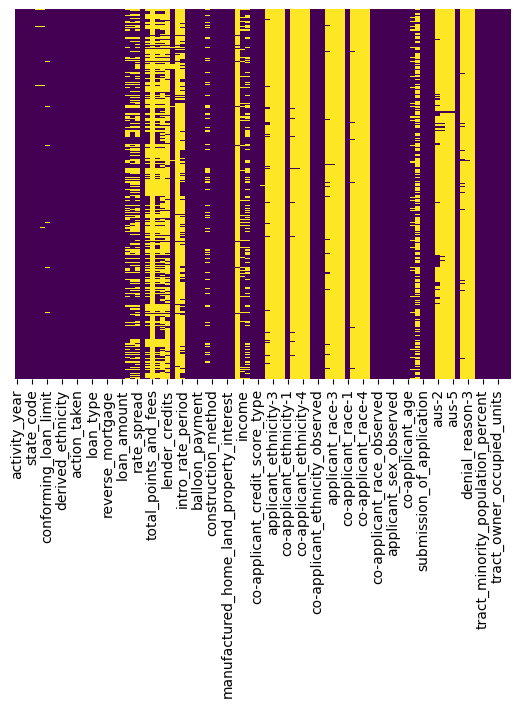

In [9]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Text(0.5, 1.0, 'Correlation Heatmap')

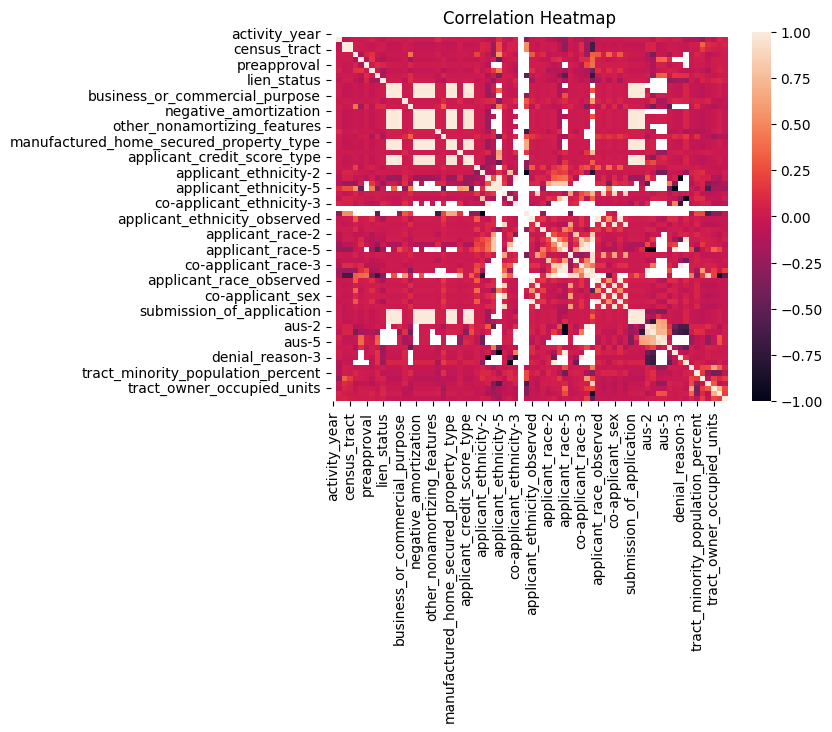

In [10]:
numeric_df = df.select_dtypes(include=['float64','int64'])
corr_matrix = numeric_df.corr()
heatmap = sns.heatmap(corr_matrix,vmin=-1,vmax=1)
heatmap.set_title("Correlation Heatmap")

# Categorical Data

In [11]:
categorical_columns = ['derived_loan_product_type','derived_dwelling_category','conforming_loan_limit','derived_ethnicity','derived_race', 'derived_sex', 'action_taken', 'purchaser_type', 'preapproval', 'loan_purpose', 
                        'reverse_mortgage', 'open-end_line_of_credit', 'business_or_commercial_purpose', 'hoepa_status', 'negative_amortization', 'interest_only_payment', 'balloon_payment',
                         'manufactured_home_secured_property_type', 'manufactured_home_land_property_interest', 'debt_to_income_ratio', 'co-applicant_credit_score_type',
                       'applicant_age','co-applicant_age', 'initially_payable_to_institution', 'aus-1']

# CLEANUP

In [12]:
df_clean = df.drop(columns=[
    'applicant_age_above_62','co-applicant_age_above_62',
    'aus-2', 'aus-3', 'aus-4', 'aus-5',
    'denial_reason-2', 'denial_reason-3','denial_reason-4', 
    'activity_year', 'total_points_and_fees','county_code',
    'lei', 'multifamily_affordable_units', 'prepayment_penalty_term', 'state_code',
    'applicant_race-1','applicant_race-2', 'applicant_race-3','applicant_race-4', 'applicant_race-5', 'co-applicant_race-2', 'co-applicant_race-3', 'co-applicant_race-4','co-applicant_race-5',  # derived_race
    'applicant_sex','applicant_sex_observed','co-applicant_sex', 'co-applicant_sex_observed', # derived_sex
    'applicant_ethnicity-1','applicant_ethnicity-2','applicant_ethnicity-3', 'applicant_ethnicity-4','applicant_ethnicity-5','applicant_ethnicity_observed', 'co-applicant_ethnicity-1','co-applicant_ethnicity-2', 'co-applicant_ethnicity-3','co-applicant_ethnicity-4', 'co-applicant_ethnicity-5', 'co-applicant_ethnicity_observed', #derived_ethnicity
    'construction_method', 'total_units', # derived_dwelling_category
    'lien_status', 'loan_type', # derived_loan_product_type
    'ffiec_msa_md_median_family_income', 'tract_to_msa_income_percentage', # derived_msa-md
    'tract_one_to_four_family_homes', 'submission_of_application', 'occupancy_type', 'other_nonamortizing_features', # ADAM
    'derived_msa-md' # NIKO
])

<Axes: >

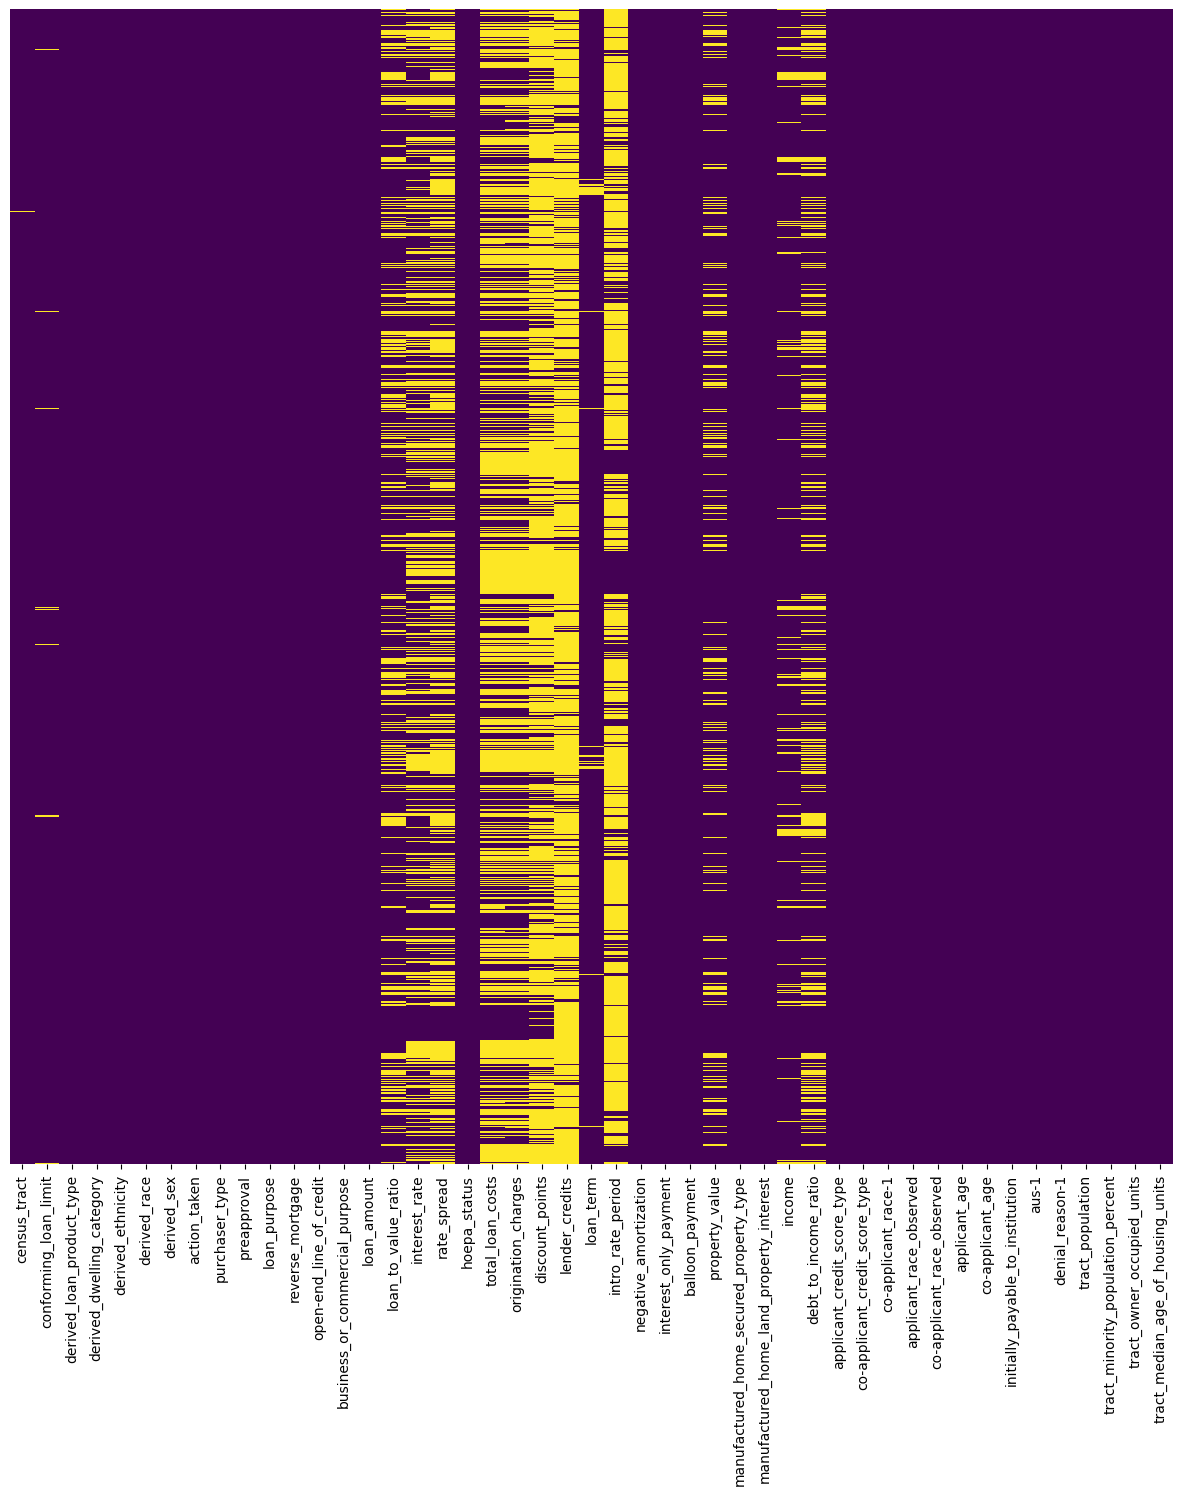

In [13]:
# Heatmap on all data.
plt.figure(figsize=(15, 15))
sns.heatmap(df_clean.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<Axes: >

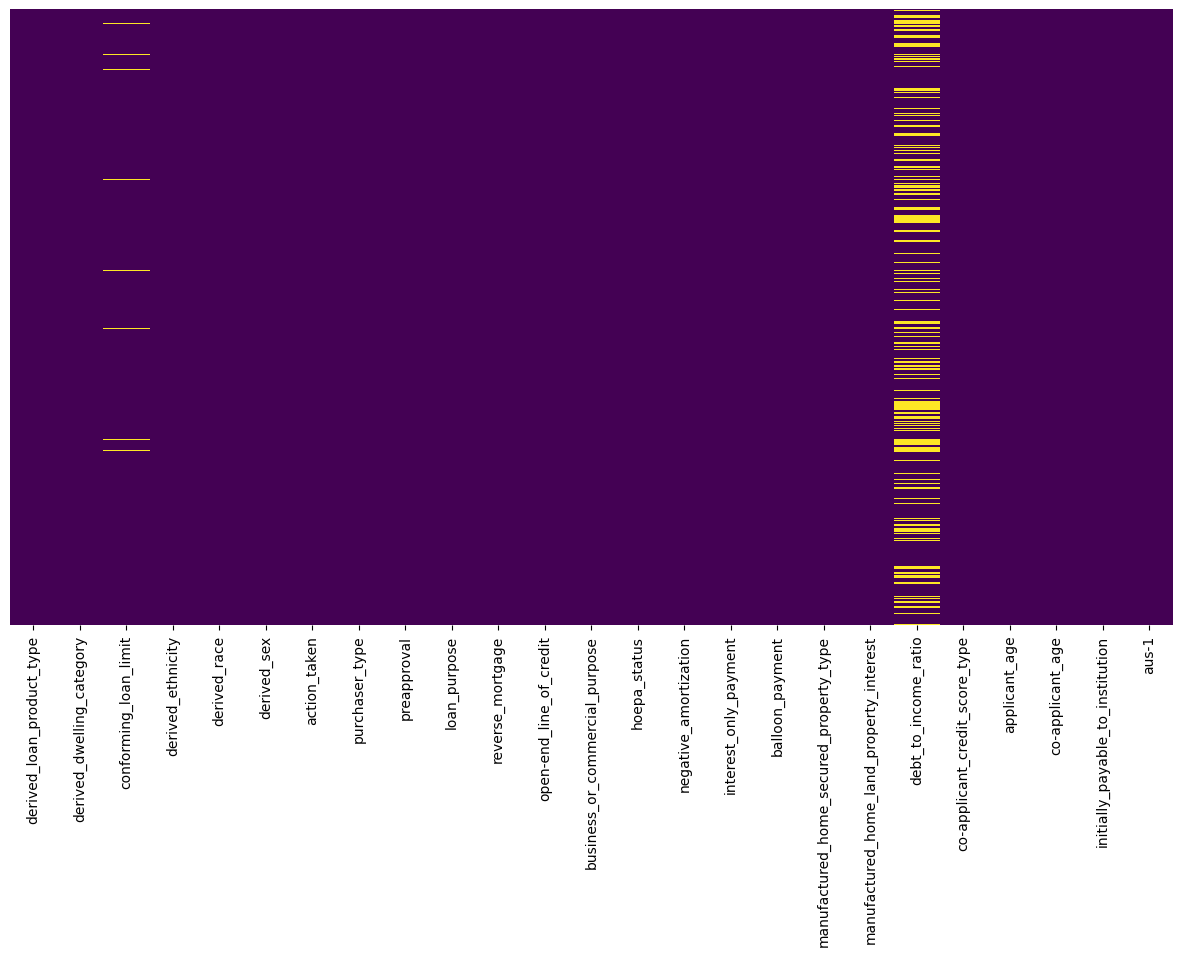

In [14]:
# Heatmap on categorical data.
plt.figure(figsize=(15, 8))
sns.heatmap(df_clean[categorical_columns].isnull(),yticklabels=False,cbar=False,cmap='viridis')

<Axes: >

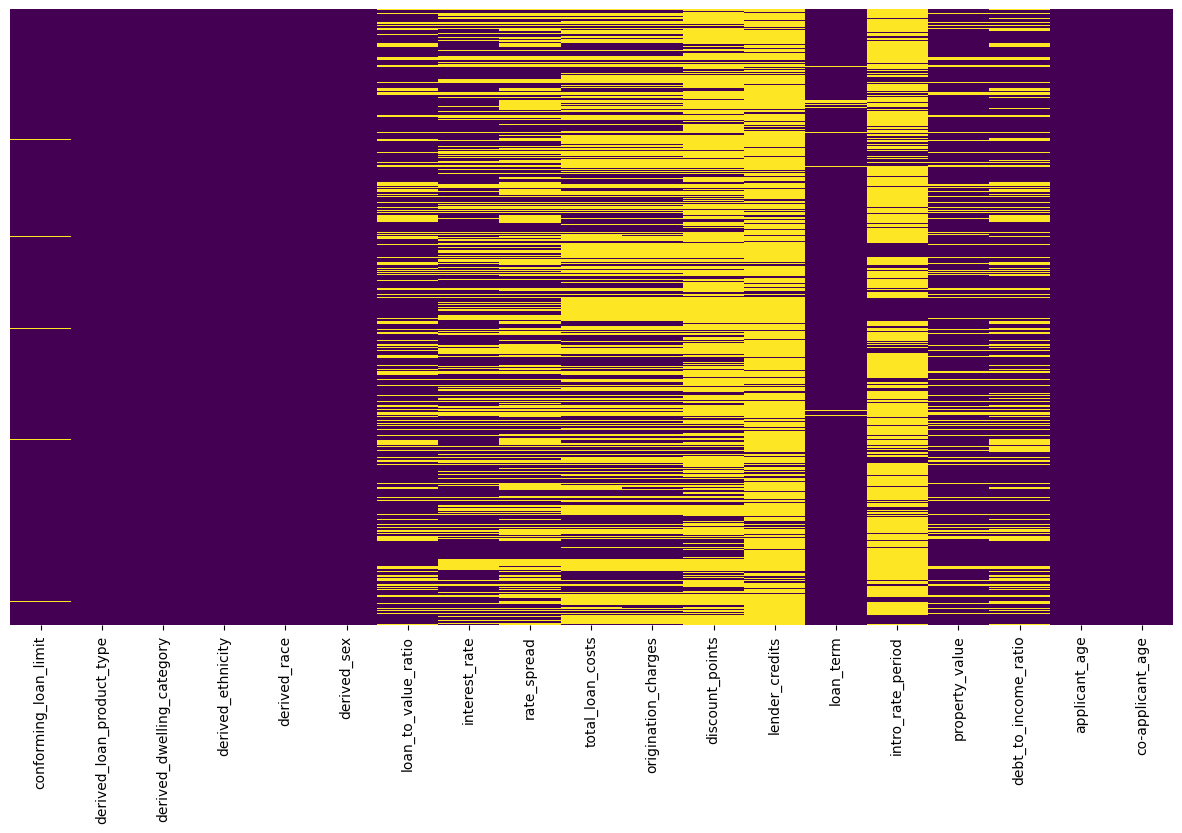

In [15]:
# Heatmap on object type data
plt.figure(figsize=(15, 8))
sns.heatmap(df_clean.select_dtypes(include=['object']).isnull(),yticklabels=False,cbar=False,cmap='viridis')

<Axes: >

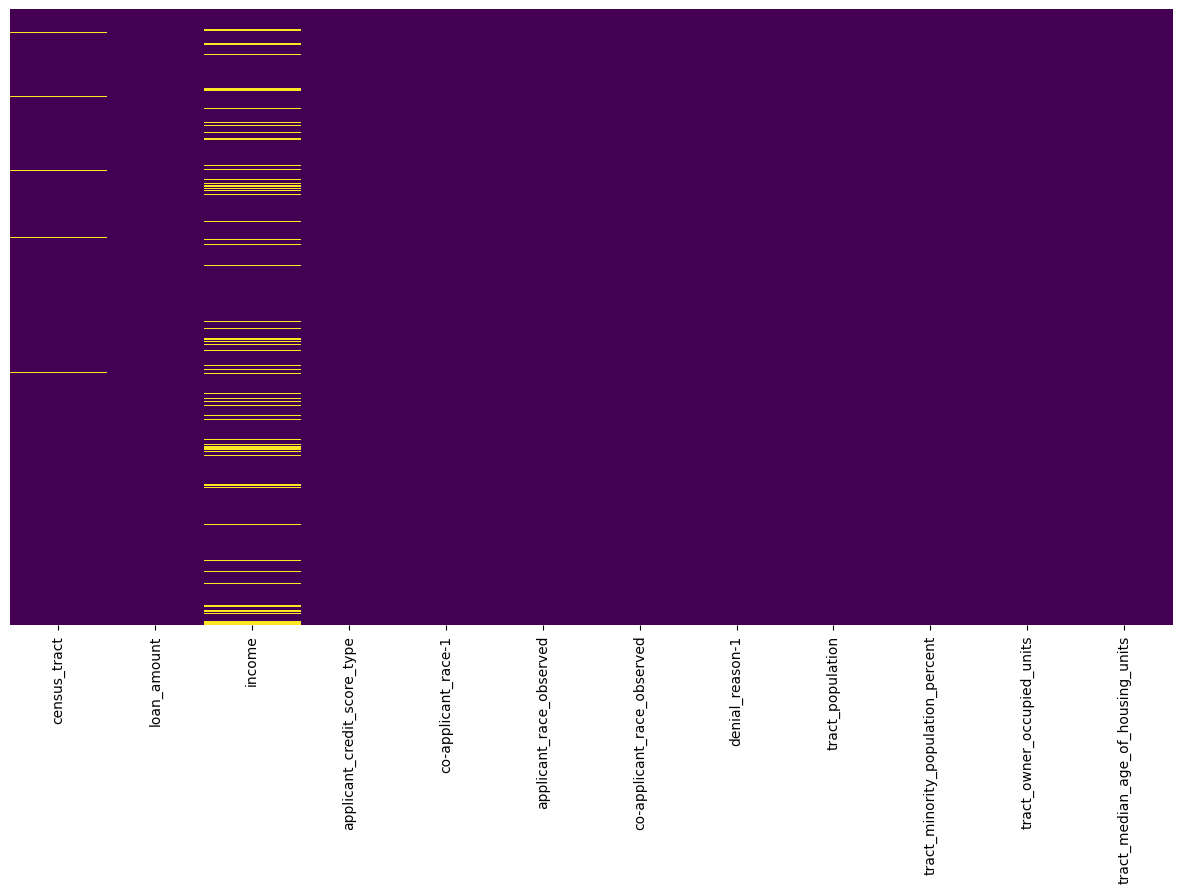

In [16]:
# Heatmap on number type data excluding categorical columns
plt.figure(figsize=(15, 8))
sns.heatmap(df_clean.drop(columns=categorical_columns).select_dtypes(include=['int64','float64']).isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Columns after cleanup

In [17]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 539194 entries, 0 to 548904
Data columns (total 47 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   census_tract                              536752 non-null  float64
 1   conforming_loan_limit                     533402 non-null  object 
 2   derived_loan_product_type                 539194 non-null  object 
 3   derived_dwelling_category                 539194 non-null  object 
 4   derived_ethnicity                         539194 non-null  object 
 5   derived_race                              539194 non-null  object 
 6   derived_sex                               539194 non-null  object 
 7   action_taken                              539194 non-null  int64  
 8   purchaser_type                            539194 non-null  int64  
 9   preapproval                               539194 non-null  int64  
 10  loan_purpose             

In [18]:
df_clean.describe()

,census_tract,action_taken,purchaser_type,preapproval,loan_purpose,reverse_mortgage,open-end_line_of_credit,business_or_commercial_purpose,loan_amount,hoepa_status,...,co-applicant_race-1,applicant_race_observed,co-applicant_race_observed,initially_payable_to_institution,aus-1,denial_reason-1,tract_population,tract_minority_population_percent,tract_owner_occupied_units,tract_median_age_of_housing_units
count,5.367520e+05,539194.000000,539194.000000,539194.000000,539194.000000,539194.000000,539194.000000,539194.000000,5.391940e+05,539194.000000,...,539146.000000,539194.000000,539194.000000,539194.000000,539194.000000,539194.000000,539194.000000,539194.000000,539194.000000,539194.000000
mean,3.606727e+10,2.337760,3.659036,1.976923,10.775862,14.590212,14.018787,14.651548,4.383650e+05,2.435096,...,6.878610,2.098145,3.212456,13.487552,16.668657,8.877565,4366.574242,35.332140,1089.091203,45.567072
std,5.730391e+07,1.716855,13.610137,0.150148,13.835401,117.506790,115.798325,118.052397,2.705260e+06,0.497797,...,2.136942,0.392054,0.955601,115.806252,117.915086,2.686288,1668.106482,27.658878,544.188564,23.609272
min,6.001431e+09,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000e+03,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,3.604705e+10,1.000000,0.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.150000e+05,2.000000,...,5.000000,2.000000,2.000000,1.000000,1.000000,10.000000,3168.000000,13.730000,671.000000,37.000000
50%,3.606502e+10,1.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.450000e+05,2.000000,...,8.000000,2.000000,4.000000,1.000000,6.000000,10.000000,4270.000000,25.700000,1062.000000,52.000000
75%,3.609106e+10,3.000000,1.000000,2.000000,31.000000,2.000000,2.000000,2.000000,4.750000e+05,3.000000,...,8.000000,2.000000,4.000000,1.000000,6.000000,10.000000,5432.000000,48.230000,1480.000000,64.000000
max,4.820141e+10,8.000000,72.000000,2.000000,32.000000,1111.000000,1111.000000,1111.000000,9.000050e+08,3.000000,...,44.000000,3.000000,4.000000,1111.000000,1111.000000,10.000000,17222.000000,100.000000,2946.000000,80.000000


In [19]:
corr_income = df_clean.corr(numeric_only=True)["income"]
corr_applicant_credit_score_type = df_clean.corr(numeric_only=True)["applicant_credit_score_type"]
corr_co_applicant_credit_score_type = df_clean.corr(numeric_only=True)["co-applicant_credit_score_type"]
corr_co_applicant_race_1 = df_clean.corr(numeric_only=True)["co-applicant_race-1"]
corr_applicant_race_observed = df_clean.corr(numeric_only=True)["applicant_race_observed"]
corr_co_applicant_race_observed = df_clean.corr(numeric_only=True)["co-applicant_race_observed"]
corr_initially_payable_to_institution = df_clean.corr(numeric_only=True)["initially_payable_to_institution"]
corr_aus_1 = df_clean.corr(numeric_only=True)["aus-1"]
corr_denial_reason_1 = df_clean.corr(numeric_only=True)["denial_reason-1"]
corr_tract_population = df_clean.corr(numeric_only=True)["tract_population"]
corr_tract_minority_population_percent = df_clean.corr(numeric_only=True)["tract_minority_population_percent"]
corr_tract_owner_occupied_units = df_clean.corr(numeric_only=True)["tract_owner_occupied_units"]
corr_tract_median_age_of_housing_units = df_clean.corr(numeric_only=True)["tract_median_age_of_housing_units"]

In [20]:
corr_aus_1

census_tract                               -0.025975
action_taken                               -0.007822
purchaser_type                             -0.029091
preapproval                                 0.005215
loan_purpose                               -0.004393
reverse_mortgage                            0.994648
open-end_line_of_credit                     0.979619
business_or_commercial_purpose              0.999315
loan_amount                                -0.004749
hoepa_status                                0.008991
negative_amortization                       0.999320
interest_only_payment                       0.999297
balloon_payment                             0.999317
manufactured_home_secured_property_type     0.999154
manufactured_home_land_property_interest    0.999147
income                                     -0.001596
applicant_credit_score_type                 0.975311
co-applicant_credit_score_type              0.975164
co-applicant_race-1                        -0.

In [21]:
df_object = df_clean.select_dtypes(include=['object'])

In [22]:
df_object

,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,derived_race,derived_sex,loan_to_value_ratio,interest_rate,rate_spread,total_loan_costs,origination_charges,discount_points,lender_credits,loan_term,intro_rate_period,property_value,debt_to_income_ratio,applicant_age,co-applicant_age
0,C,Conventional:First Lien,Single Family (1-4 Units):Manufactured,Not Hispanic or Latino,Native Hawaiian or Other Pacific Islander,Joint,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300,NaN,125000.0,>60%,45-54,35-44
1,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,360,NaN,265000.0,NaN,8888,9999
2,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,360,NaN,NaN,NaN,8888,9999
3,U,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,360,NaN,NaN,NaN,8888,9999
4,U,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,360,NaN,1175000.0,NaN,8888,9999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548900,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,NaN,6.75,NaN,NaN,NaN,NaN,NaN,360,NaN,275000.0,NaN,8888,9999
548901,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,360,NaN,NaN,NaN,8888,9999
548902,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,360,NaN,NaN,NaN,8888,9999
548903,NC,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,360,NaN,1435000.0,NaN,8888,9999


In [23]:
df_obj_columns=['loan_to_value_ratio', 'interest_rate', 'rate_spread',
   'total_loan_costs', 'origination_charges', 'discount_points',
   'lender_credits', 'loan_term', 'intro_rate_period', 'property_value']

for column_name in df_obj_columns:
    df_clean[column_name] = df_clean[column_name].replace('Exempt', np.NaN).astype(np.float64)
    

In [24]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 539194 entries, 0 to 548904
Data columns (total 47 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   census_tract                              536752 non-null  float64
 1   conforming_loan_limit                     533402 non-null  object 
 2   derived_loan_product_type                 539194 non-null  object 
 3   derived_dwelling_category                 539194 non-null  object 
 4   derived_ethnicity                         539194 non-null  object 
 5   derived_race                              539194 non-null  object 
 6   derived_sex                               539194 non-null  object 
 7   action_taken                              539194 non-null  int64  
 8   purchaser_type                            539194 non-null  int64  
 9   preapproval                               539194 non-null  int64  
 10  loan_purpose             

df_encoded_categorical.info()

# Correlation

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

def analyze_categorical_association(df, col1, col2, plot_title=None):
    """
    Perform a chi-square test on two categorical columns and plot the contingency table.
    
    Parameters:
    - df: The DataFrame containing the data.
    - col1, col2: The names of the two categorical columns to analyze.
    - plot_title: An optional title for the plot.
    """
    def create_contingency_table(df, col1, col2):
        """Create a contingency table for two categorical columns."""
        contingency_table = pd.crosstab(df[col1], df[col2])
        return contingency_table

    def chi_square_test(df, col1, col2):
        """Perform a chi-square test on two categorical columns."""
        contingency_table = create_contingency_table(df, col1, col2)
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        return chi2, p, contingency_table

    # Perform the chi-square test
    chi2, p_value, contingency_table = chi_square_test(df, col1, col2)

    # Plotting the contingency table
    plt.figure(figsize=(10, 6))
    sns.heatmap(contingency_table, annot=True, cmap='coolwarm', fmt='d')
    if plot_title:
        plt.title(plot_title)
    else:
        plt.title(f'Contingency Table for "{col1}" and "{col2}"')
    plt.xlabel(col2)
    plt.ylabel(col1)
    
    # Adding chi-square statistic and p-value below the plot
    plt.text(0.5, -0.2, f'Chi-square: {chi2:.2f}\np-value: {p_value:.2e}',
             horizontalalignment='center', verticalalignment='center',
             transform=plt.gca().transAxes, fontsize=12, color='black')
    
    plt.show()


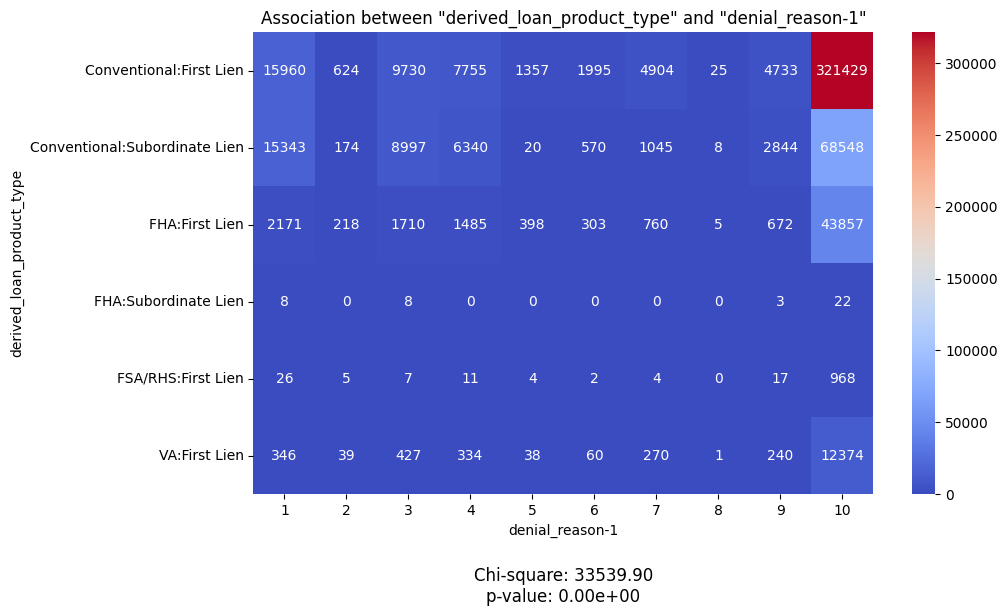

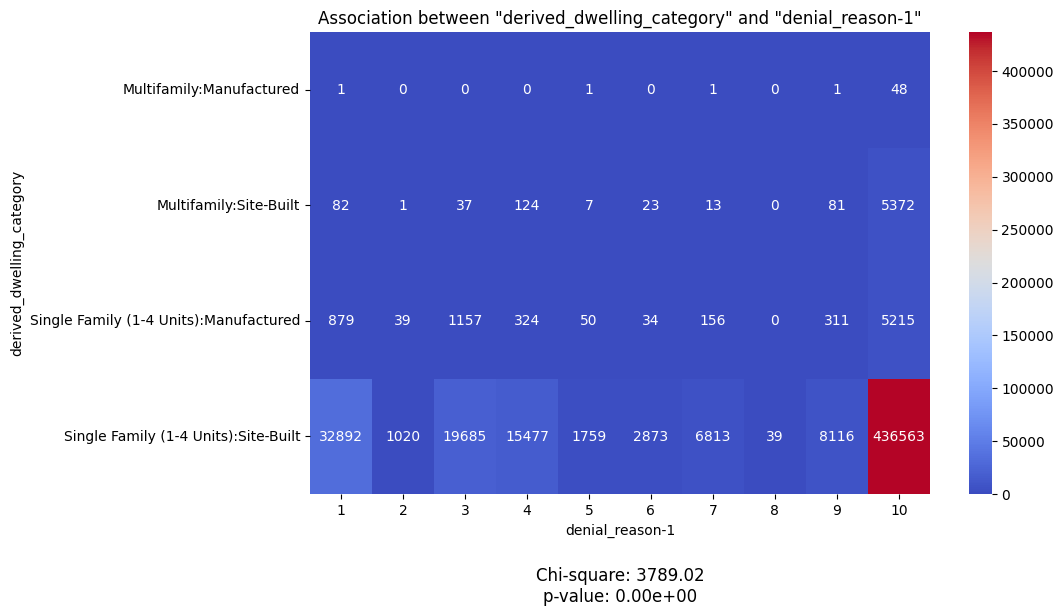

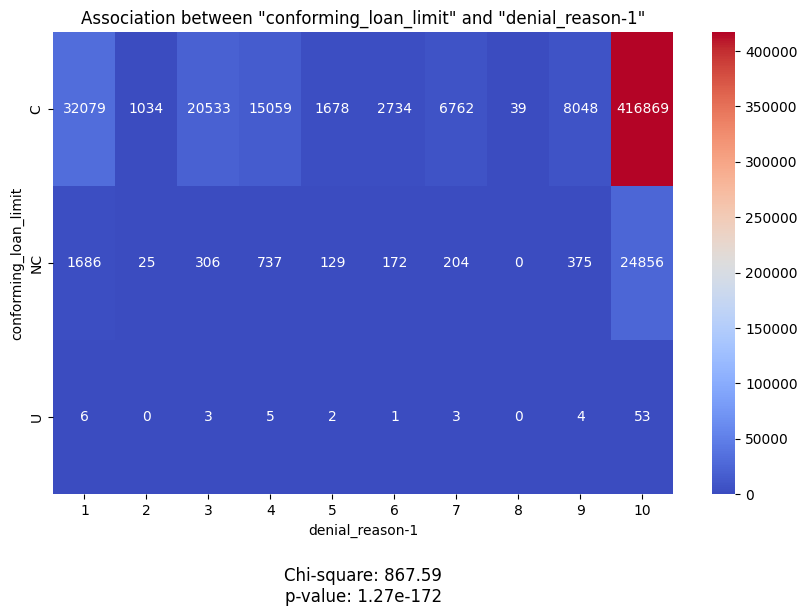

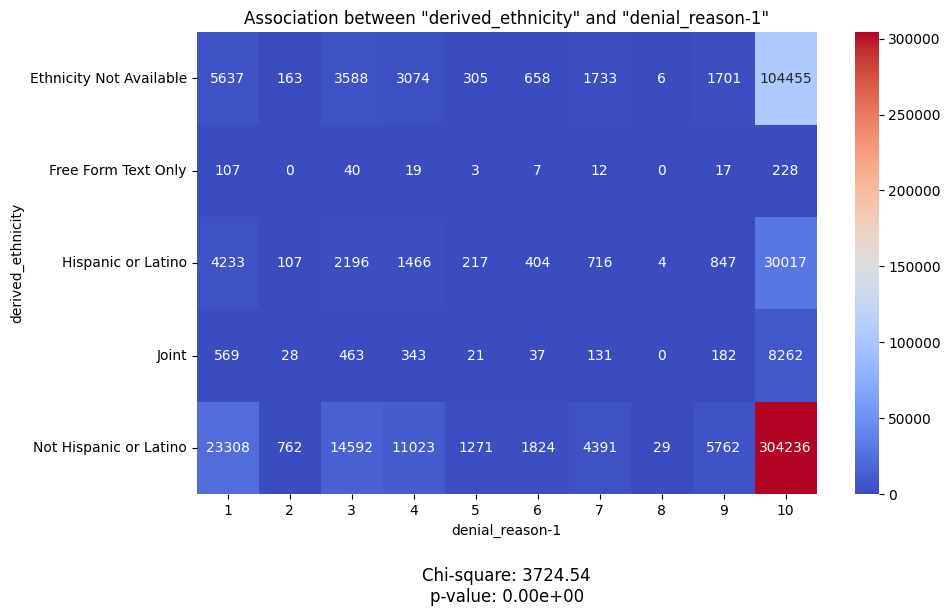

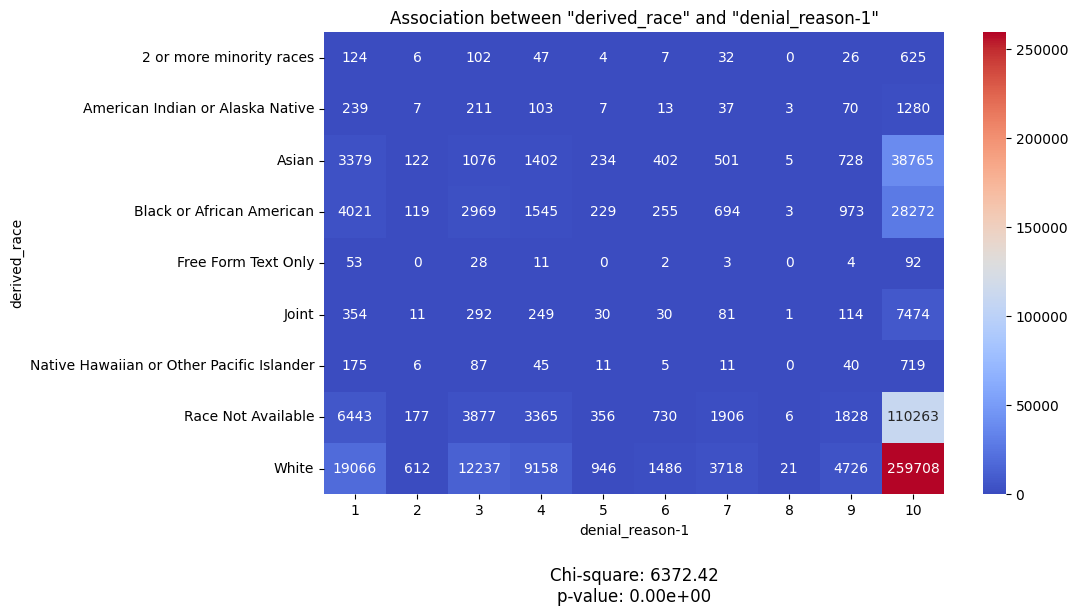

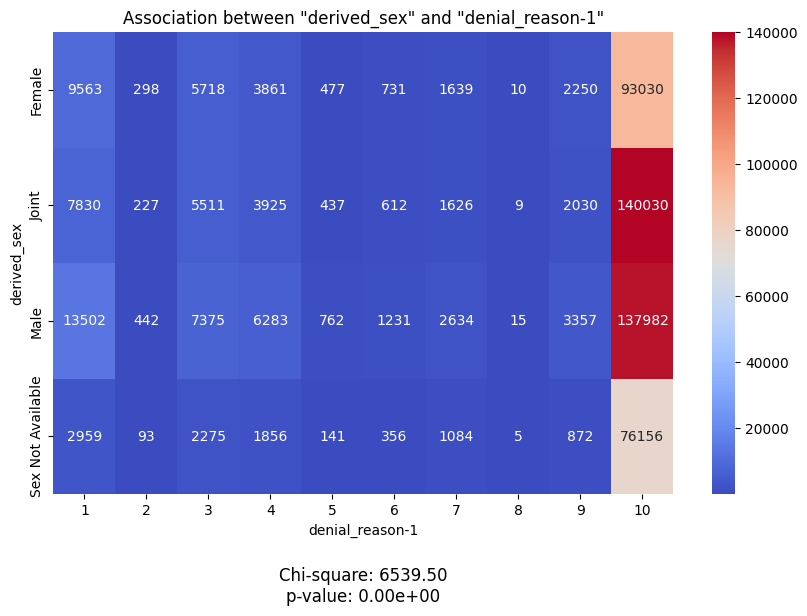

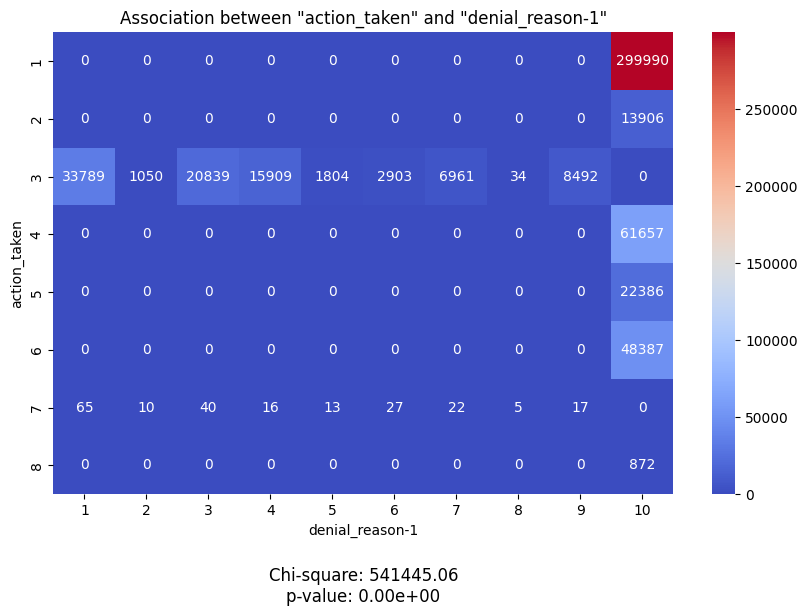

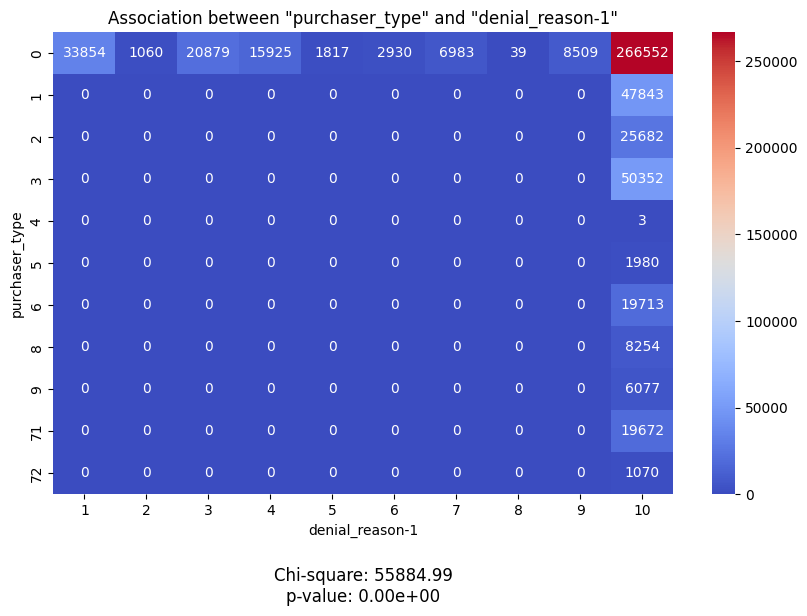

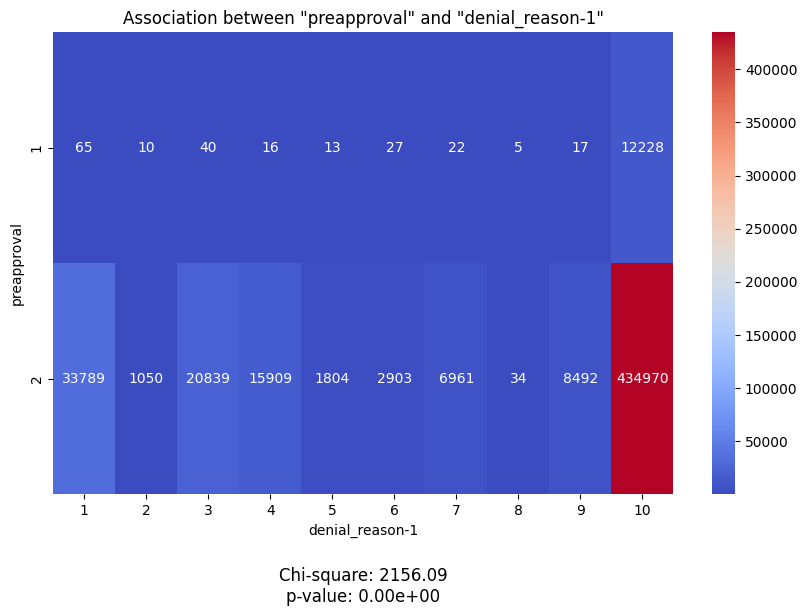

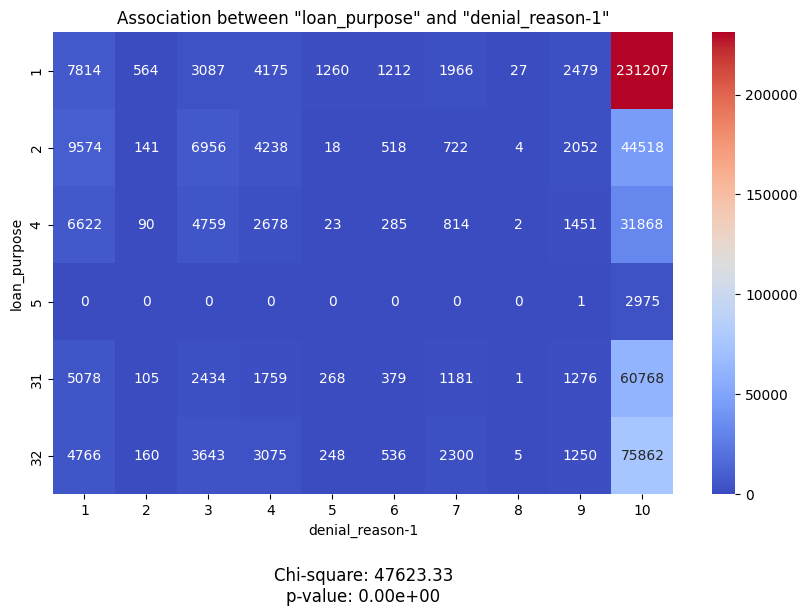

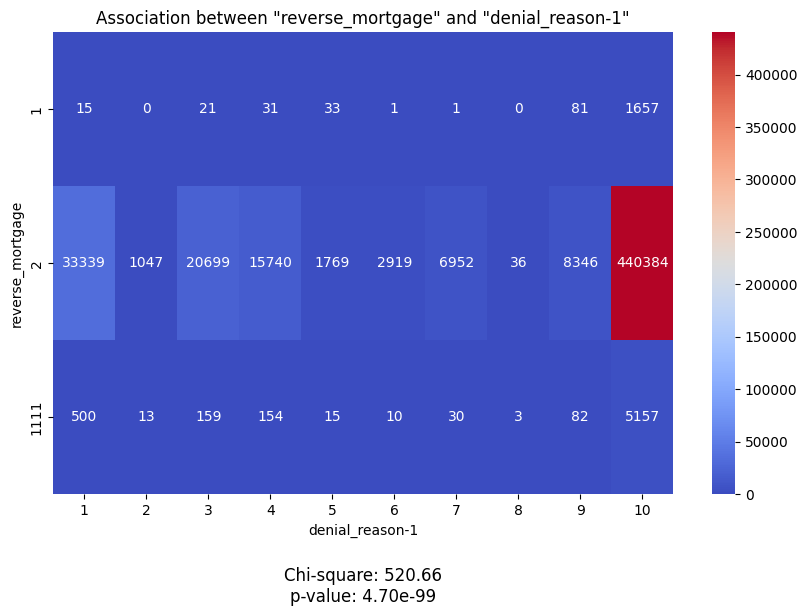

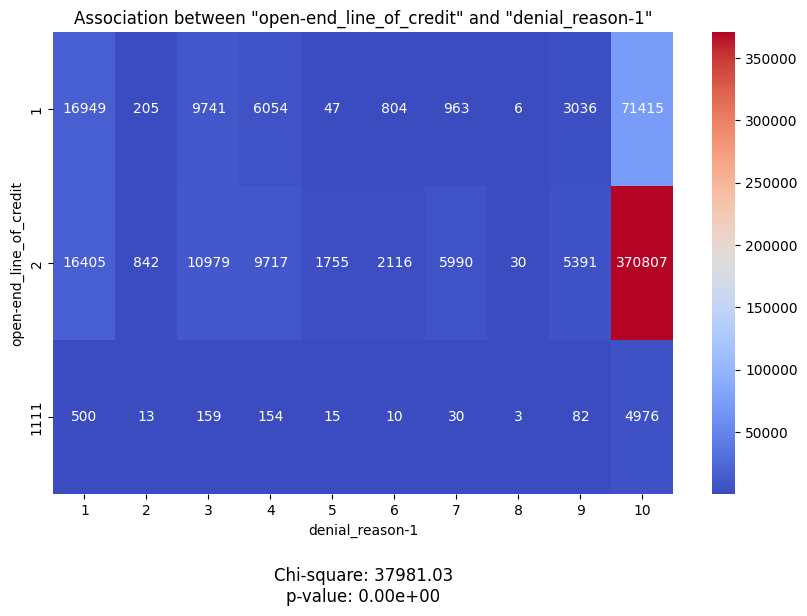

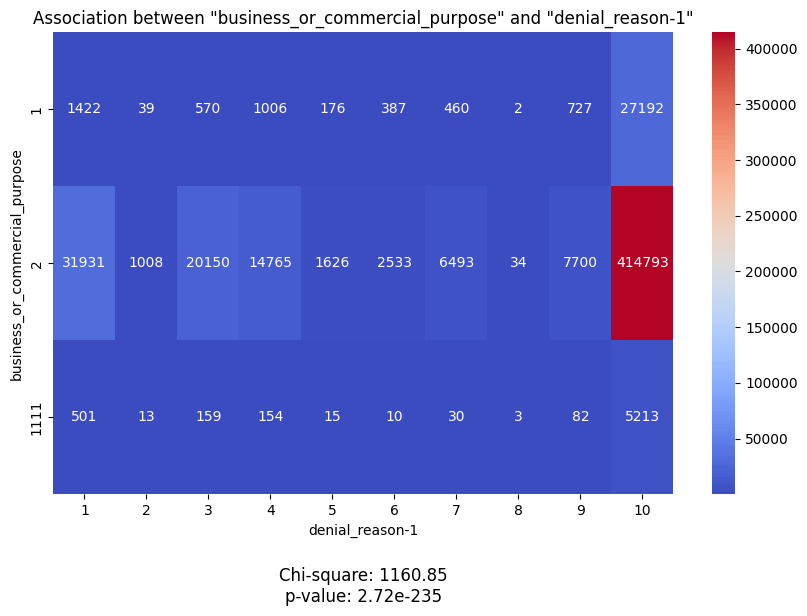

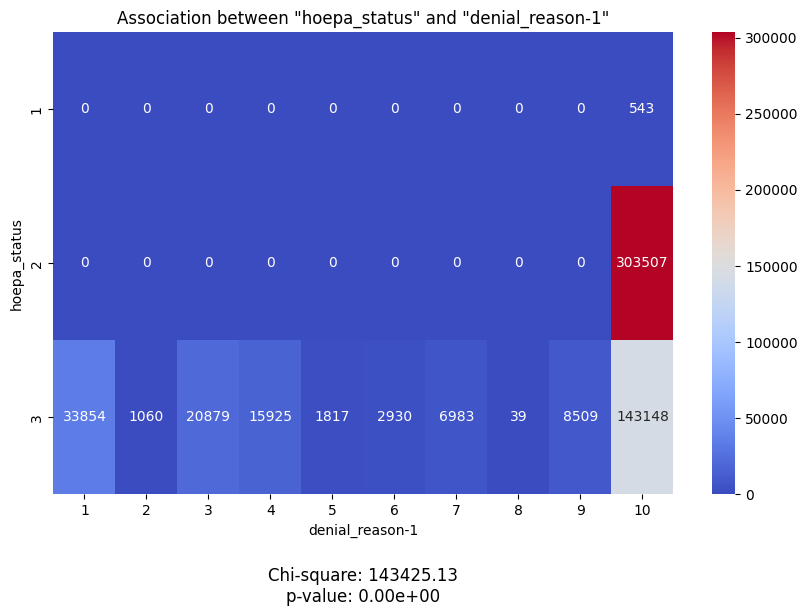

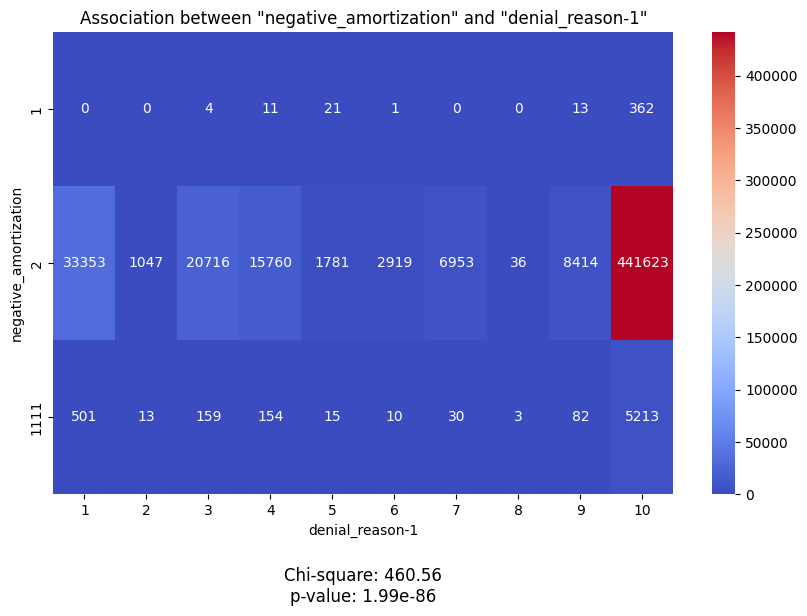

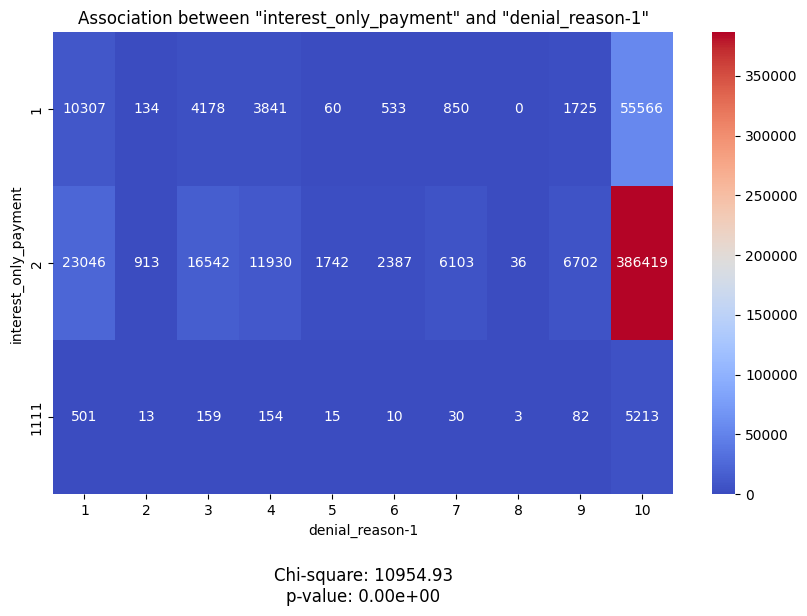

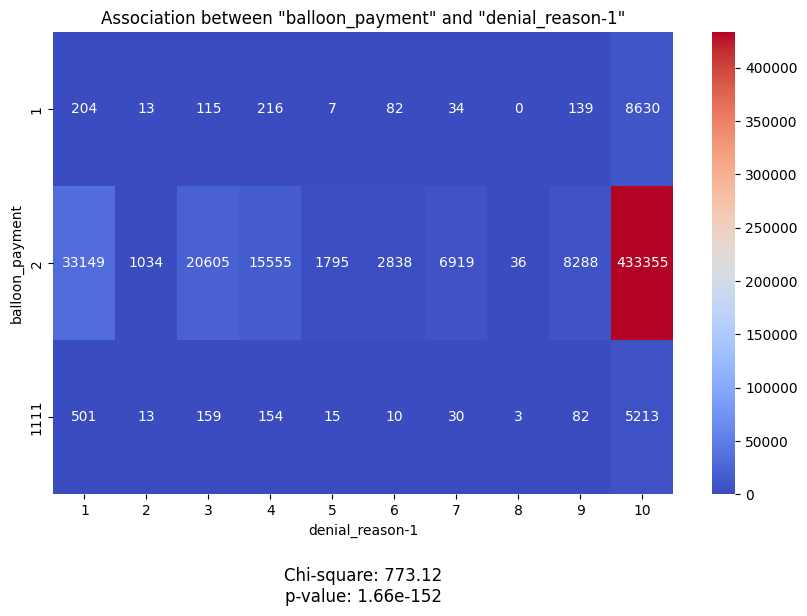

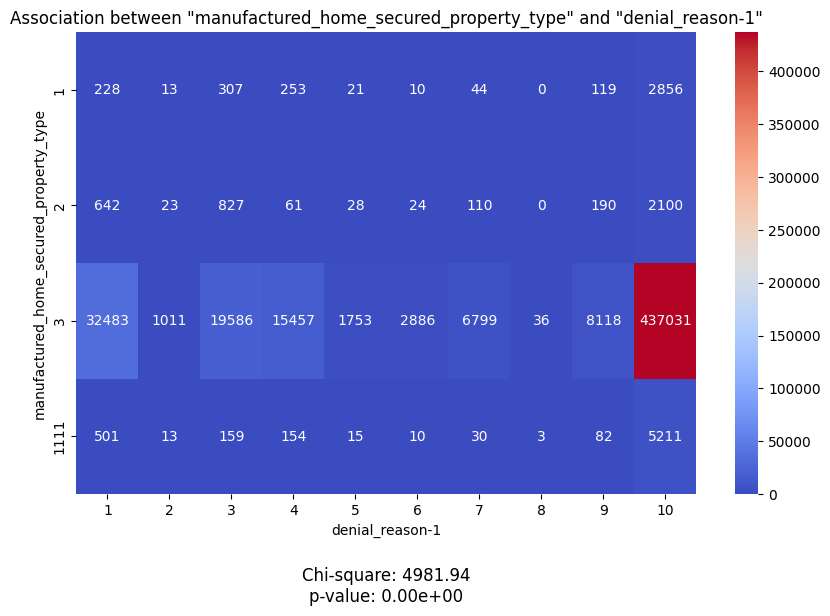

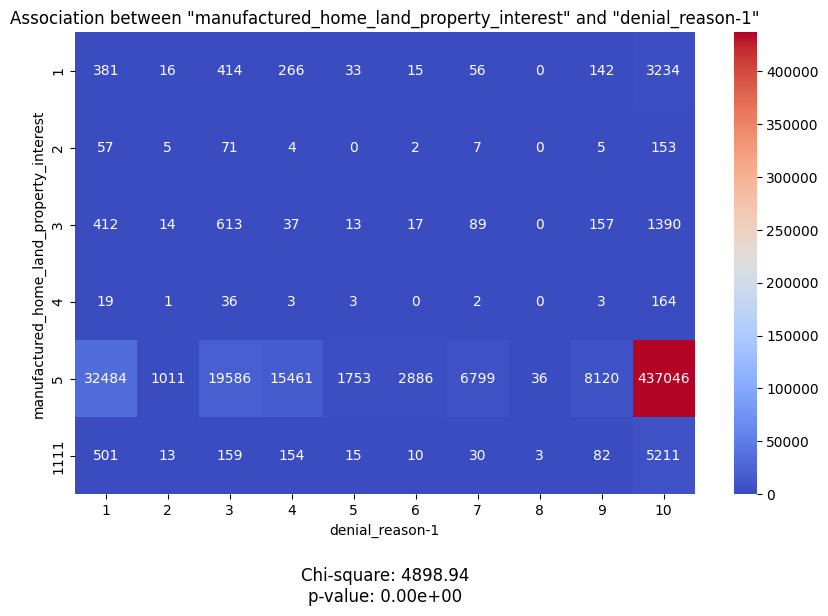

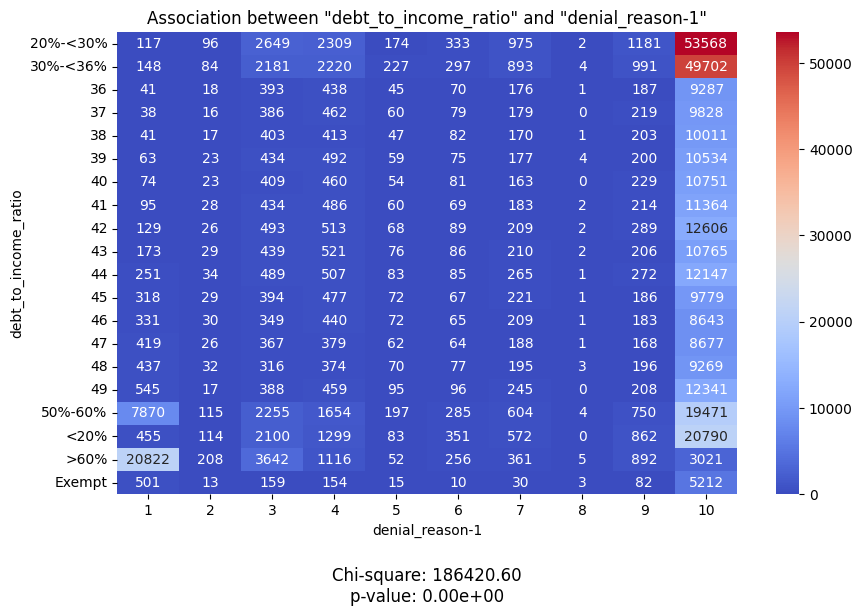

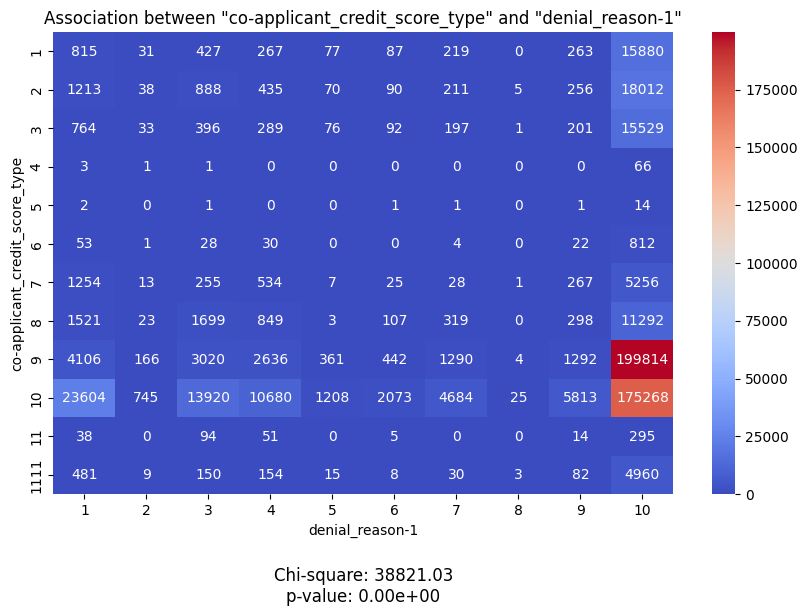

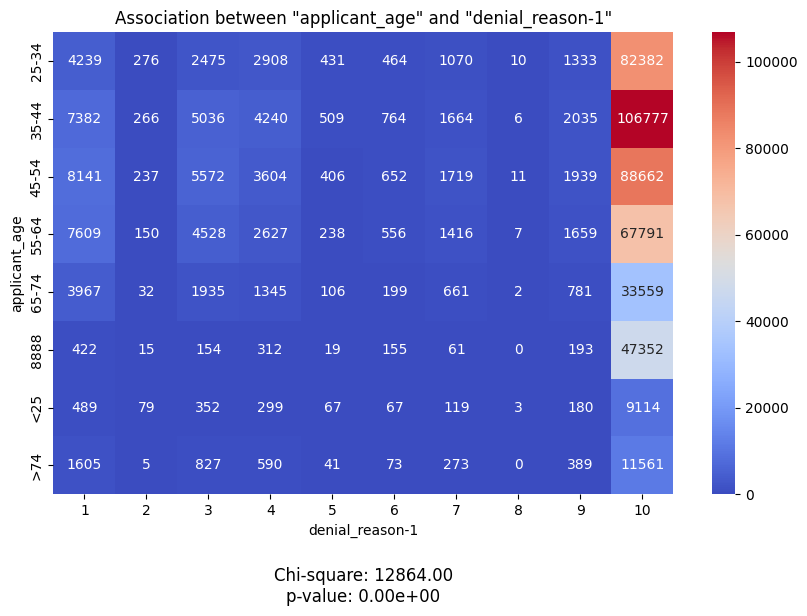

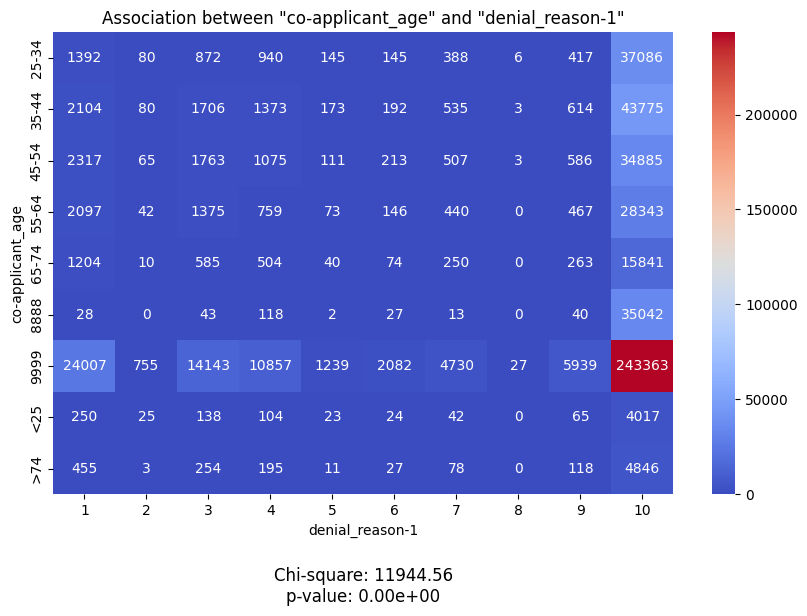

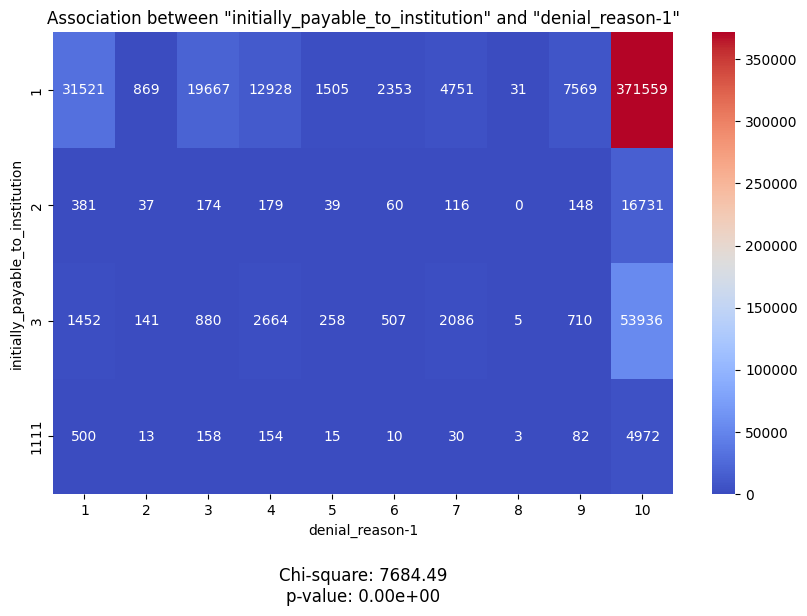

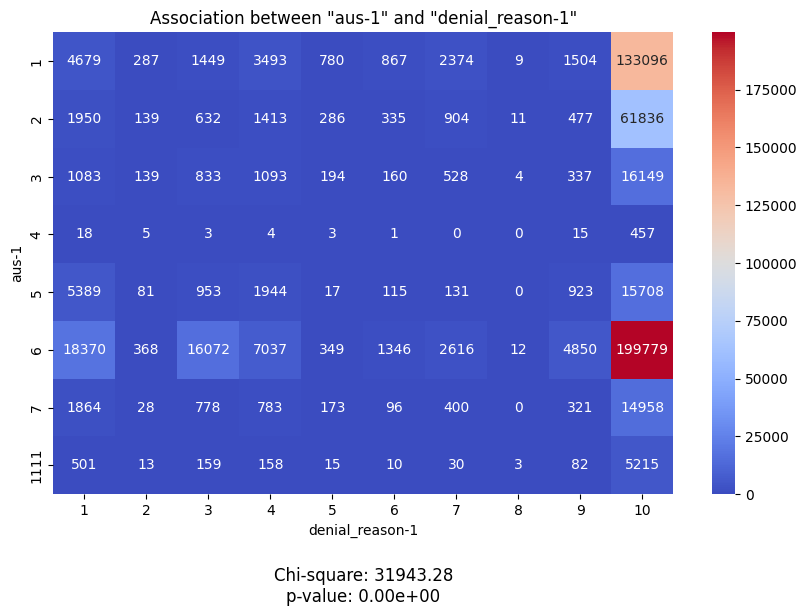

In [26]:
for column in categorical_columns:
    analyze_categorical_association(df_clean, column, 'denial_reason-1', plot_title=f'Association between "{column}" and "denial_reason-1"')
    print("\n")

# Preprocessing Categorical -> Numeric

In [27]:
from sklearn import preprocessing

# Converting all categorical variables into numerical

label = preprocessing.LabelEncoder()
data_encoded = pd.DataFrame() 
df_encoded_categorical = df_clean.copy(deep=True)

# df_obj_columns contains columns with float64, NaN & 'Exempt' values and 'Exempt' values are converted to NaN
df_categorical_columns_no_obj = [column for column in categorical_columns if column not in df_obj_columns]


for column in categorical_columns:
    df_encoded_categorical[column] = label.fit_transform(df_encoded_categorical[column])

# OneHotEncoder on categorical data

In [28]:
from sklearn.preprocessing import OneHotEncoder

In [29]:
df_clean_encoded_categorical = pd.get_dummies(df_clean,columns=categorical_columns)

In [30]:
df_clean_encoded_categorical.info()

<class 'pandas.core.frame.DataFrame'>
Index: 539194 entries, 0 to 548904
Columns: 172 entries, census_tract to aus-1_1111
dtypes: bool(150), float64(15), int64(7)
memory usage: 171.7 MB


In [31]:
df_clean_encoded_categorical.head()

,census_tract,loan_amount,loan_to_value_ratio,interest_rate,rate_spread,total_loan_costs,origination_charges,discount_points,lender_credits,loan_term,...,initially_payable_to_institution_3,initially_payable_to_institution_1111,aus-1_1,aus-1_2,aus-1_3,aus-1_4,aus-1_5,aus-1_6,aus-1_7,aus-1_1111
0,3.600505e+10,125000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300.0,...,False,False,False,False,False,False,False,True,False,False
1,NaN,215000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,360.0,...,False,False,False,False,False,False,False,True,False,False
2,NaN,415000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,360.0,...,False,False,False,False,False,False,False,True,False,False
3,NaN,1425000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,360.0,...,False,False,False,False,False,False,False,True,False,False
4,NaN,885000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,360.0,...,False,False,False,False,False,False,False,True,False,False


In [32]:
df_clean_encoded_categorical.describe()

,census_tract,loan_amount,loan_to_value_ratio,interest_rate,rate_spread,total_loan_costs,origination_charges,discount_points,lender_credits,loan_term,...,income,applicant_credit_score_type,co-applicant_race-1,applicant_race_observed,co-applicant_race_observed,denial_reason-1,tract_population,tract_minority_population_percent,tract_owner_occupied_units,tract_median_age_of_housing_units
count,5.367520e+05,5.391940e+05,387896.000000,356284.000000,277694.000000,2.568510e+05,259122.000000,139935.000000,86553.000000,521607.000000,...,4.870610e+05,539194.000000,539146.000000,539194.000000,539194.000000,539194.000000,539194.000000,539194.000000,539194.000000,539194.000000
mean,3.606727e+10,4.383650e+05,71.234349,4.517759,0.179816,8.220393e+03,4123.678490,4434.715997,1324.215976,321.678009,...,1.946793e+02,17.298761,6.878610,2.098145,3.212456,8.877565,4366.574242,35.332140,1089.091203,45.567072
std,5.730391e+07,2.705260e+06,162.299668,1.656372,1.155616,1.304771e+04,5444.798344,5168.560500,2798.667405,76.055871,...,3.253712e+03,115.008650,2.136942,0.392054,0.955601,2.686288,1668.106482,27.658878,544.188564,23.609272
min,6.001431e+09,5.000000e+03,0.002000,0.000000,-7.290000,0.000000e+00,0.000000,0.010000,0.010000,1.000000,...,-1.150200e+04,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,3.604705e+10,1.150000e+05,58.000000,3.375000,-0.260000,3.756245e+03,994.000000,1200.000000,79.000000,300.000000,...,7.100000e+01,2.000000,5.000000,2.000000,2.000000,10.000000,3168.000000,13.730000,671.000000,37.000000
50%,3.606502e+10,2.450000e+05,75.000000,4.375000,0.229000,5.978950e+03,2067.500000,2806.310000,370.560000,360.000000,...,1.120000e+02,3.000000,8.000000,2.000000,4.000000,10.000000,4270.000000,25.700000,1062.000000,52.000000
75%,3.609106e+10,4.750000e+05,84.921000,5.500000,0.717000,1.034246e+04,5502.420000,5868.700000,1166.900000,360.000000,...,1.770000e+02,9.000000,8.000000,2.000000,4.000000,10.000000,5432.000000,48.230000,1480.000000,64.000000
max,4.820141e+10,9.000050e+08,85654.720000,450.000000,100.000000,4.579017e+06,225570.350000,171143.000000,99641.700000,705.000000,...,1.946619e+06,1111.000000,44.000000,3.000000,4.000000,10.000000,17222.000000,100.000000,2946.000000,80.000000


# PCA on OneHotEncoded categorical without object types where all rows != NaN

In [33]:
df_clean_object_columns = df_clean_encoded_categorical.select_dtypes(include=['object']).columns
df_clean_object_columns

Index([], dtype='object')

In [34]:
df_clean_encoded_categorical_without_objects = df_clean_encoded_categorical.drop(columns=df_clean_object_columns)
df_clean_encoded_categorical_without_objects.info()

<class 'pandas.core.frame.DataFrame'>
Index: 539194 entries, 0 to 548904
Columns: 172 entries, census_tract to aus-1_1111
dtypes: bool(150), float64(15), int64(7)
memory usage: 171.7 MB


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC


df_clean_categorical_without_objects_dropna = df_clean_encoded_categorical_without_objects.dropna()

X = df_clean_categorical_without_objects_dropna.drop(columns=['denial_reason-1'])
y = df_clean_categorical_without_objects_dropna['denial_reason-1']
columns = df_clean_categorical_without_objects_dropna.columns


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.fit_transform(X_test)

In [36]:
pca = PCA()
pca.fit(X_train)
X_train_pca = pca.transform(X_train_scaler)
X_test_pca = pca.transform(X_test_scaler)

In [37]:
# svm = SVC(kernel='linear', C=1)
# svm.fit(X_train_pca, y_train)
# svm_predictions = svm.predict(X_test_pca)

# print(classification_report(y_test, rf_predictions, target_names=names))

Brakujące wartości

In [48]:
missing_percentage = df_clean_encoded_categorical_without_objects.isnull().mean() * 100

missing_percentage = missing_percentage[missing_percentage != 0]

print("Procent brakujących wartości z każdej kolumny:")
print(missing_percentage)

Procent brakujących wartości z każdej kolumny:
census_tract            0.452898
loan_to_value_ratio    28.060030
interest_rate          33.922855
rate_spread            48.498314
total_loan_costs       52.363899
origination_charges    51.942714
discount_points        74.047374
lender_credits         83.947707
loan_term               3.261720
intro_rate_period      75.491382
property_value         17.830317
income                  9.668691
co-applicant_race-1     0.008902
dtype: float64


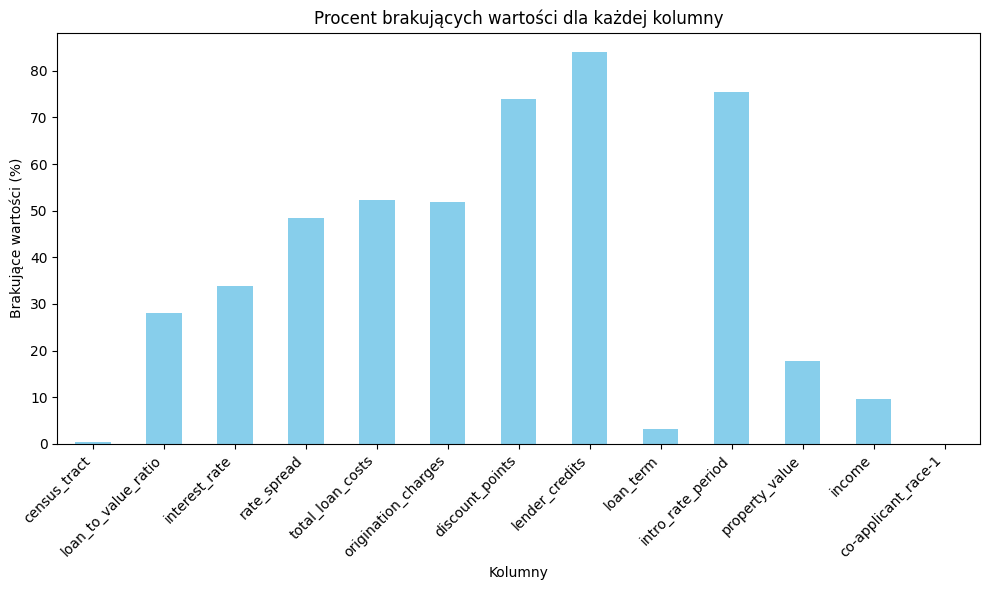

In [49]:
plt.figure(figsize=(10, 6))
missing_percentage.plot(kind='bar', color='skyblue')
plt.title('Procent brakujących wartości dla każdej kolumny')
plt.xlabel('Kolumny')
plt.ylabel('Brakujące wartości (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Wartości odstające - zakres międzykwantylowy (IQR)

In [50]:
numeric_columns = df_clean_encoded_categorical_without_objects.select_dtypes(include=['number'])
quantiles = numeric_columns.quantile([0, 0.25, 0.5, 0.75, 1])

print(quantiles)

      census_tract  loan_amount  loan_to_value_ratio  interest_rate   
0.00  6.001431e+09       5000.0                0.002          0.000  \
0.25  3.604705e+10     115000.0               58.000          3.375   
0.50  3.606502e+10     245000.0               75.000          4.375   
0.75  3.609106e+10     475000.0               84.921          5.500   
1.00  4.820141e+10  900005000.0            85654.720        450.000   

      rate_spread  total_loan_costs  origination_charges  discount_points   
0.00       -7.290             0.000                 0.00             0.01  \
0.25       -0.260          3756.245               994.00          1200.00   
0.50        0.229          5978.950              2067.50          2806.31   
0.75        0.717         10342.460              5502.42          5868.70   
1.00      100.000       4579017.000            225570.35        171143.00   

      lender_credits  loan_term  ...     income  applicant_credit_score_type   
0.00            0.01        1.

In [67]:
import statsmodels.api as sm

for column in numeric_columns.columns:
    selected_column = numeric_columns[column]
    
    # Generate Q-Q plot
    sm.qqplot(selected_column, line='s')
    plt.title(f'Q-Q Plot for {column}')
    plt.ylabel('Theoretical Quantiles')
    plt.xlabel('Sample Quantiles')
    plt.show()

AttributeError: 'DataFrame' object has no attribute 'iteritems'

Wartości odstające - metoda trzech sigm

In [44]:
means = numeric_columns.mean()
std_devs = numeric_columns.std()

lower_bound = means - 3 * std_devs
upper_bound = means + 3 * std_devs

outliers = (numeric_columns < lower_bound) | (numeric_columns > upper_bound)

print(numeric_columns[outliers.any(axis=1)])


        census_tract  loan_amount  loan_to_value_ratio  interest_rate   
35      3.610900e+10      75000.0                  NaN          10.25  \
37      3.601104e+10      35000.0                  NaN           9.50   
38      3.607502e+10      35000.0                  NaN          11.50   
52      3.609106e+10      15000.0                  NaN          11.25   
53      3.609106e+10      45000.0                  NaN          10.50   
...              ...          ...                  ...            ...   
548670  3.606101e+10     325000.0               69.995            NaN   
548730  3.610317e+10     675000.0                  NaN            NaN   
548743  3.610317e+10     105000.0               70.038           4.75   
548747  3.606102e+10     755000.0               35.714           2.75   
548825  3.605952e+10     505000.0               31.250           4.75   

        rate_spread  total_loan_costs  origination_charges  discount_points   
35              NaN               NaN       